In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

In [22]:
mineral_data = pd.read_csv('/Users/marpinipavansrikar/Downloads/table_page_11.csv')
mineral_data

,Mineral,Year,No. of mines submitting returns,Below ground,Opencastworkings,Aboveground,Total,Output (in ’000 tonnes),Value of output (in million Rs.),Unnamed: 9
0,Bauxite,1961,31,--,"2,745",301,"3,046",4760,5,NaN
1,NaN,1971,58,14,"4,128",673,"4,815","1,449",18,NaN
2,NaN,1981,48,--,"3,586",731,"4,317","1,747",81,NaN
3,NaN,1991,80,--,"3,968",959,"4,927","3,862",599,NaN
4,NaN,2000,100,--,"4,391",996,"5,387","6,387","1,339",NaN
...,...,...,...,...,...,...,...,...,...,...
264,NaN,2011,"2,041","9,783","104,665","85,674","200,112",--,"818,504",NaN
265,NaN,2012,"2,233","9,590","108,965","84,345","202,909",--,"104,4085",NaN
266,NaN,2013,"2,318","10,372","109,327","91,626","211,325",--,"107,7548",NaN
267,NaN,2014,"2,346","11,181","106,849","89,826","207,856",NaN,"108,7512",NaN


In [23]:
mineral_data.drop('Unnamed: 9', axis=1, inplace=True)
mineral_data

,Mineral,Year,No. of mines submitting returns,Below ground,Opencastworkings,Aboveground,Total,Output (in ’000 tonnes),Value of output (in million Rs.)
0,Bauxite,1961,31,--,"2,745",301,"3,046",4760,5
1,NaN,1971,58,14,"4,128",673,"4,815","1,449",18
2,NaN,1981,48,--,"3,586",731,"4,317","1,747",81
3,NaN,1991,80,--,"3,968",959,"4,927","3,862",599
4,NaN,2000,100,--,"4,391",996,"5,387","6,387","1,339"
...,...,...,...,...,...,...,...,...,...
264,NaN,2011,"2,041","9,783","104,665","85,674","200,112",--,"818,504"
265,NaN,2012,"2,233","9,590","108,965","84,345","202,909",--,"104,4085"
266,NaN,2013,"2,318","10,372","109,327","91,626","211,325",--,"107,7548"
267,NaN,2014,"2,346","11,181","106,849","89,826","207,856",NaN,"108,7512"


In [24]:
mineral_data['Mineral'] = mineral_data['Mineral'].fillna(method='ffill')
mineral_data

/var/folders/qz/j3x70md175s0mvjjj3rtlkfc0000gn/T/ipykernel_54753/2315654751.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



,Mineral,Year,No. of mines submitting returns,Below ground,Opencastworkings,Aboveground,Total,Output (in ’000 tonnes),Value of output (in million Rs.)
0,Bauxite,1961,31,--,"2,745",301,"3,046",4760,5
1,Bauxite,1971,58,14,"4,128",673,"4,815","1,449",18
2,Bauxite,1981,48,--,"3,586",731,"4,317","1,747",81
3,Bauxite,1991,80,--,"3,968",959,"4,927","3,862",599
4,Bauxite,2000,100,--,"4,391",996,"5,387","6,387","1,339"
...,...,...,...,...,...,...,...,...,...
264,Oil,2011,"2,041","9,783","104,665","85,674","200,112",--,"818,504"
265,Oil,2012,"2,233","9,590","108,965","84,345","202,909",--,"104,4085"
266,Oil,2013,"2,318","10,372","109,327","91,626","211,325",--,"107,7548"
267,Oil,2014,"2,346","11,181","106,849","89,826","207,856",NaN,"108,7512"


In [25]:
imputer = SimpleImputer(strategy='constant', fill_value=0)
mineral_data = pd.DataFrame(imputer.fit_transform(mineral_data), columns=mineral_data.columns)

In [26]:
numeric_cols = ['Year','No. of mines submitting returns','Below ground','Opencastworkings','Aboveground','Total','Output (in ’000 tonnes)','Value of output (in million Rs.)']
mineral_data[numeric_cols] = mineral_data[numeric_cols].apply(pd.to_numeric, errors='coerce')
mineral_data[numeric_cols] = mineral_data[numeric_cols].fillna(0).astype(int)

In [27]:
mineral_data.isnull().sum()

Mineral                             0
Year                                0
No. of mines submitting returns     0
Below ground                        0
Opencastworkings                    0
Aboveground                         0
Total                               0
Output (in ’000 tonnes)             0
Value of output (in million Rs.)    0
dtype: int64

In [28]:
mineral_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,269.0,1861.048327,514.158733,0.0,2000.0,2005.0,2010.0,2015.0
No. of mines submitting returns,269.0,107.014870,138.207744,0.0,4.0,42.0,177.0,808.0
Below ground,269.0,27.498141,109.786653,0.0,0.0,0.0,0.0,987.0
Opencastworkings,269.0,58.799257,149.780700,0.0,0.0,0.0,0.0,938.0
Aboveground,269.0,109.520446,383.367693,0.0,0.0,0.0,0.0,5026.0
Total,269.0,228.858736,2584.920384,0.0,0.0,0.0,0.0,41781.0
Output (in ’000 tonnes),269.0,36.315985,308.972214,0.0,0.0,0.0,0.0,4760.0
Value of output (in million Rs.),269.0,34.249071,129.510247,0.0,0.0,0.0,0.0,970.0


In [29]:
mineral_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Mineral                           269 non-null    object
 1   Year                              269 non-null    int64 
 2   No. of mines submitting returns   269 non-null    int64 
 3   Below ground                      269 non-null    int64 
 4   Opencastworkings                  269 non-null    int64 
 5   Aboveground                       269 non-null    int64 
 6   Total                             269 non-null    int64 
 7   Output (in ’000 tonnes)           269 non-null    int64 
 8   Value of output (in million Rs.)  269 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 19.0+ KB


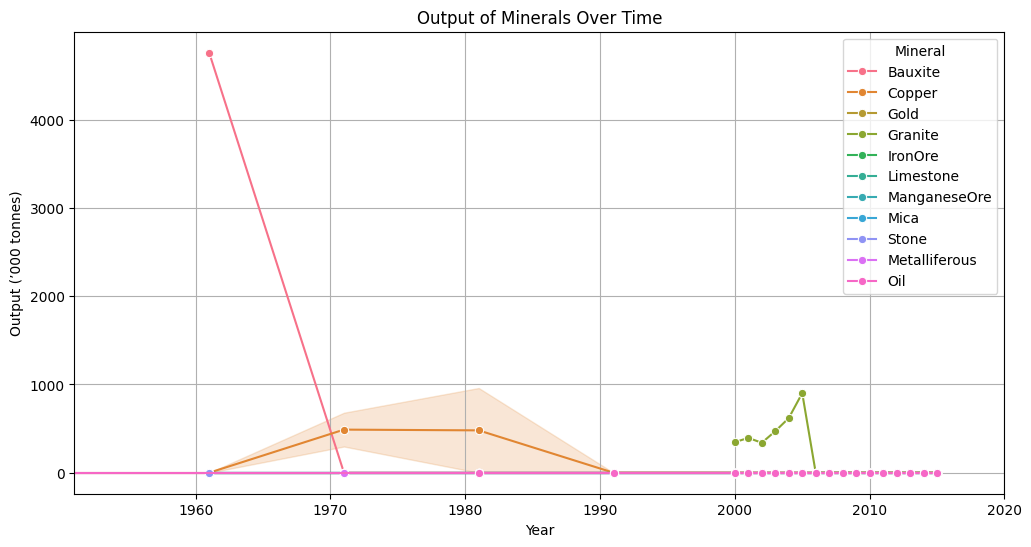

In [31]:
plt.figure(figsize=(12,6))
sns.lineplot(data=mineral_data, x='Year', y='Output (in ’000 tonnes)', hue='Mineral', marker='o')
plt.title('Output of Minerals Over Time')
plt.ylabel('Output (’000 tonnes)')
plt.legend(title='Mineral')
plt.grid(True)
plt.xlim(left=1951,right=2020)   
plt.show()


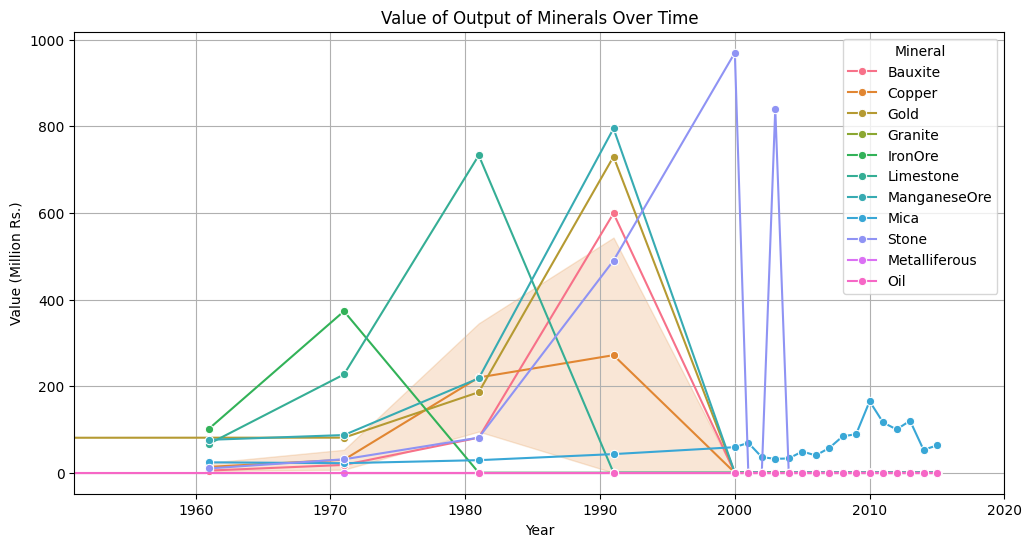

In [18]:
plt.figure(figsize=(12,6))
sns.lineplot(data=mineral_data, x='Year', y='Value of output (in million Rs.)', hue='Mineral', marker='o')
plt.title('Value of Output of Minerals Over Time')
plt.ylabel('Value (Million Rs.)')
plt.grid(True)
plt.xlim(left=1951,right=2020)   
plt.show()

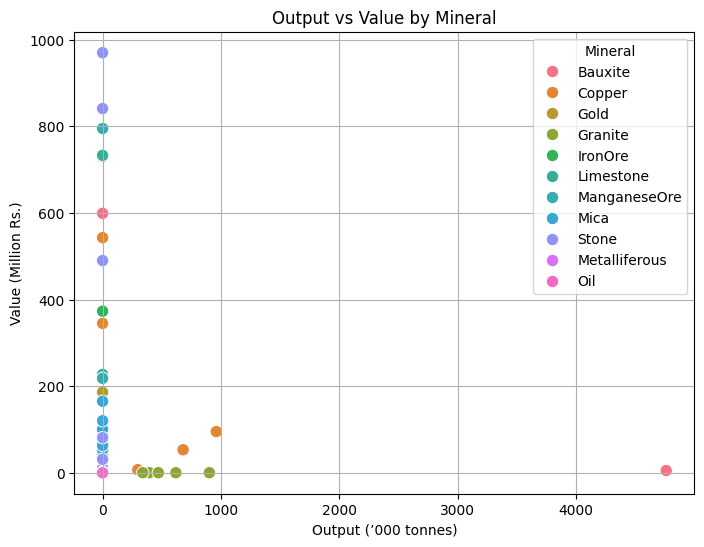

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=mineral_data, x='Output (in ’000 tonnes)', y='Value of output (in million Rs.)', hue='Mineral', s=80)
plt.title('Output vs Value by Mineral')
plt.xlabel('Output (’000 tonnes)')
plt.ylabel('Value (Million Rs.)')
plt.grid(True)
plt.show()

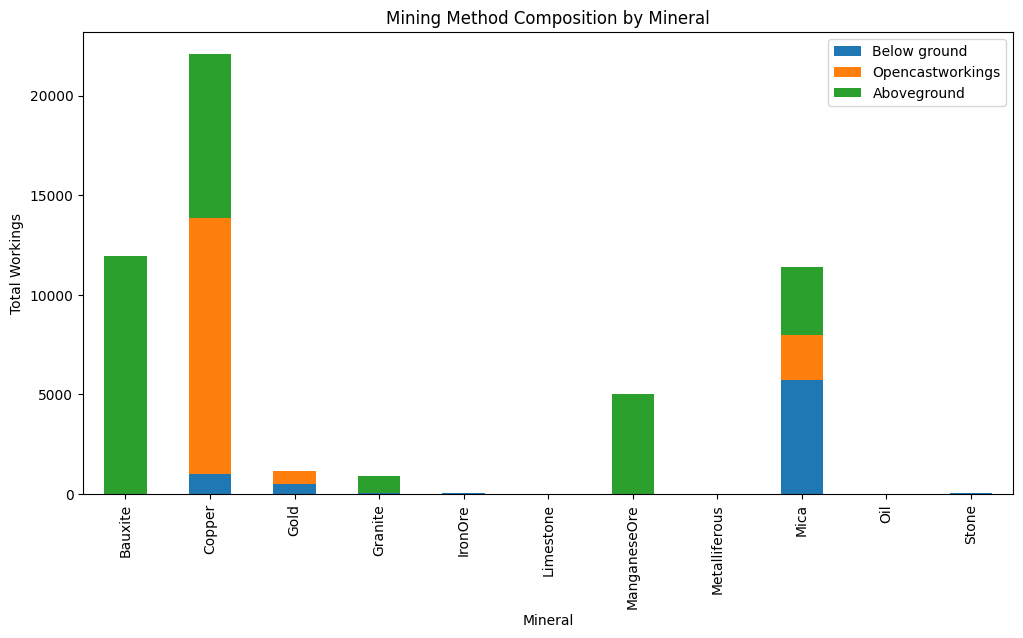

In [13]:
subset = mineral_data.groupby('Mineral')[['Below ground','Opencastworkings','Aboveground']].sum()
subset.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Mining Method Composition by Mineral')
plt.ylabel('Total Workings')
plt.show()


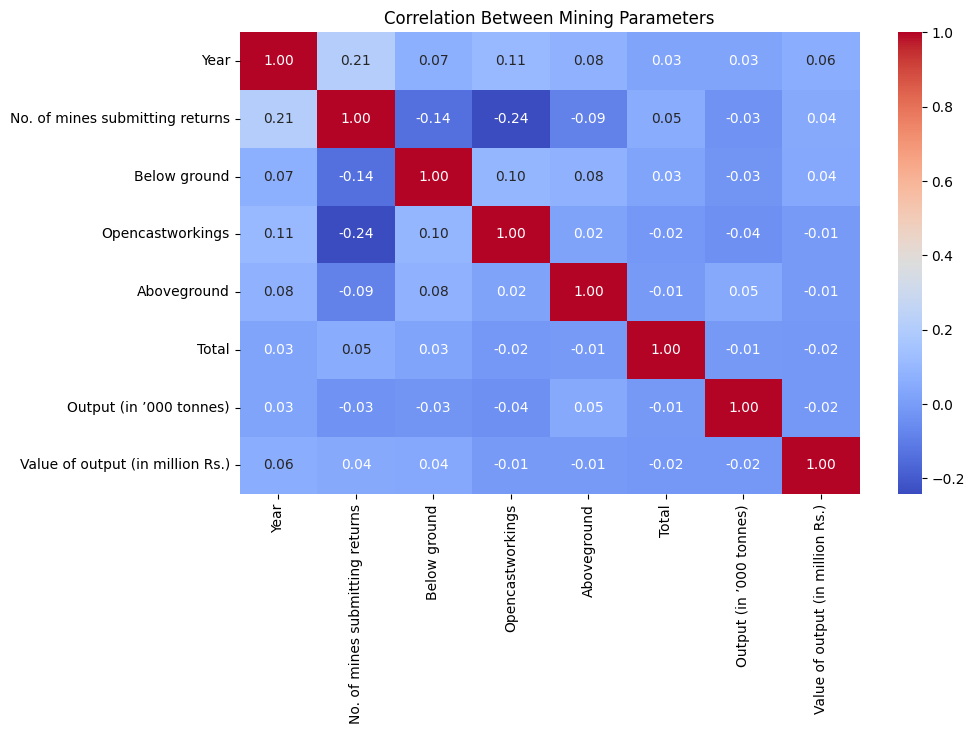

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(mineral_data.select_dtypes('number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Mining Parameters')
plt.show()


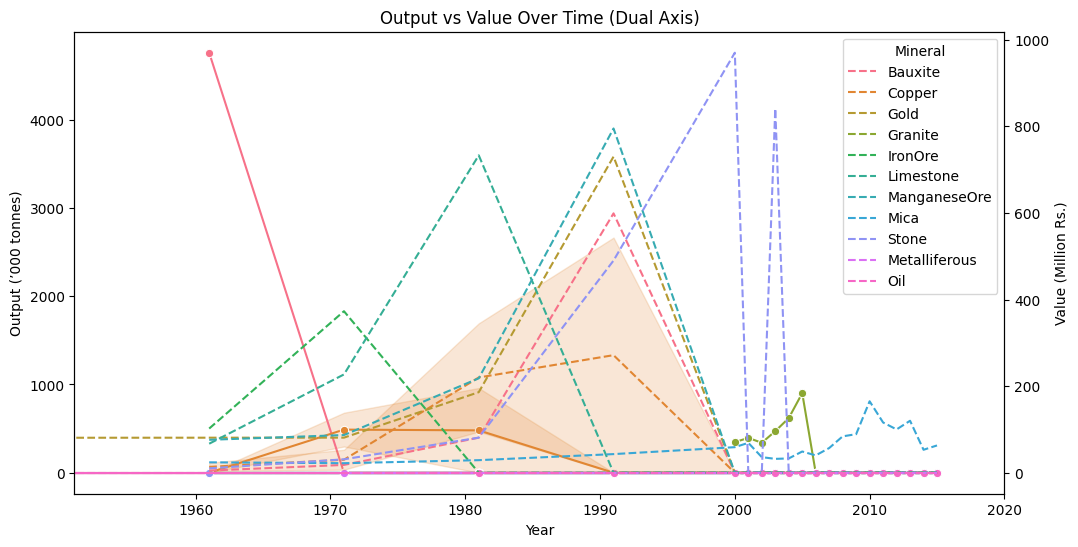

In [32]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=mineral_data, x='Year', y='Output (in ’000 tonnes)', hue='Mineral', marker='o', legend=False)
ax2 = ax.twinx()
sns.lineplot(data=mineral_data, x='Year', y='Value of output (in million Rs.)', hue='Mineral', ax=ax2, linestyle='--')
ax.set_ylabel('Output (’000 tonnes)')
ax2.set_ylabel('Value (Million Rs.)')
plt.title('Output vs Value Over Time (Dual Axis)')
plt.xlim(left=1951,right=2020)   
plt.show()


In [17]:
import plotly.express as px

mineral_data.columns = mineral_data.columns.str.replace('[’‘\'"]', "'", regex=True)
y_col = "Output (in '000 tonnes)"
fig = px.bar(
    mineral_data,
    x='Mineral',
    y=y_col,
    color='Mineral',
    animation_frame='Year',
    range_y=[0, mineral_data[y_col].max() * 1.1],
    title='Evolution of Mineral Output Over the Years',
    text=y_col,
    color_discrete_sequence=px.colors.qualitative.Safe  
)
fig.update_traces(
    texttemplate='%{text:.2s}', 
    textposition='outside',
    hovertemplate='Mineral: %{x}<br>Output: %{y:,} (’000 tonnes)<br>Year: %{animation_frame}'
)
fig.update_layout(
    title_font=dict(size=20, family='Arial', color='black'),
    xaxis_title='Mineral',
    yaxis_title="Output (’000 tonnes)",
    xaxis_tickangle=-45,
    plot_bgcolor='white',
    showlegend=False,
    margin=dict(l=50, r=50, t=80, b=100)
)
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgrey')

fig.show()
